   Stress Level  Sleep Duration  Quality of Sleep  Daily Steps
0             6             6.1                 6         4200
1             8             6.2                 6        10000
2             8             6.2                 6        10000
3             8             5.9                 4         3000
4             8             5.9                 4         3000

Summary Statistics:
       Stress Level  Sleep Duration  Quality of Sleep   Daily Steps
count    374.000000      374.000000        374.000000    374.000000
mean       5.385027        7.132086          7.312834   6816.844920
std        1.774526        0.795657          1.196956   1617.915679
min        3.000000        5.800000          4.000000   3000.000000
25%        4.000000        6.400000          6.000000   5600.000000
50%        5.000000        7.200000          7.000000   7000.000000
75%        7.000000        7.800000          8.000000   8000.000000
max        8.000000        8.500000          9.000000  10

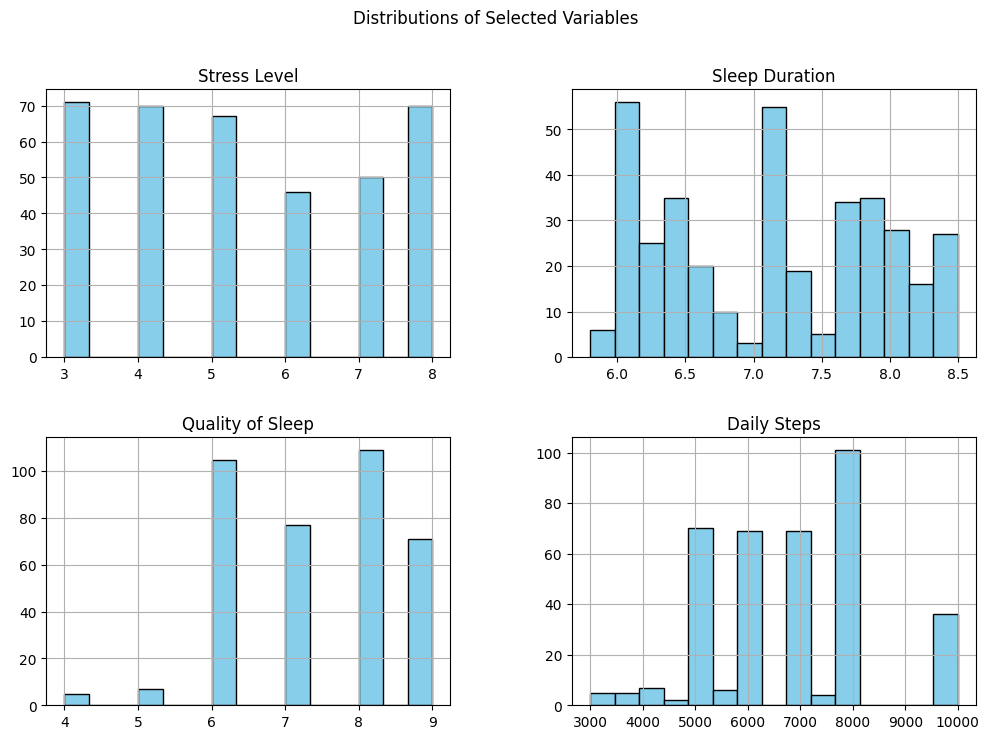

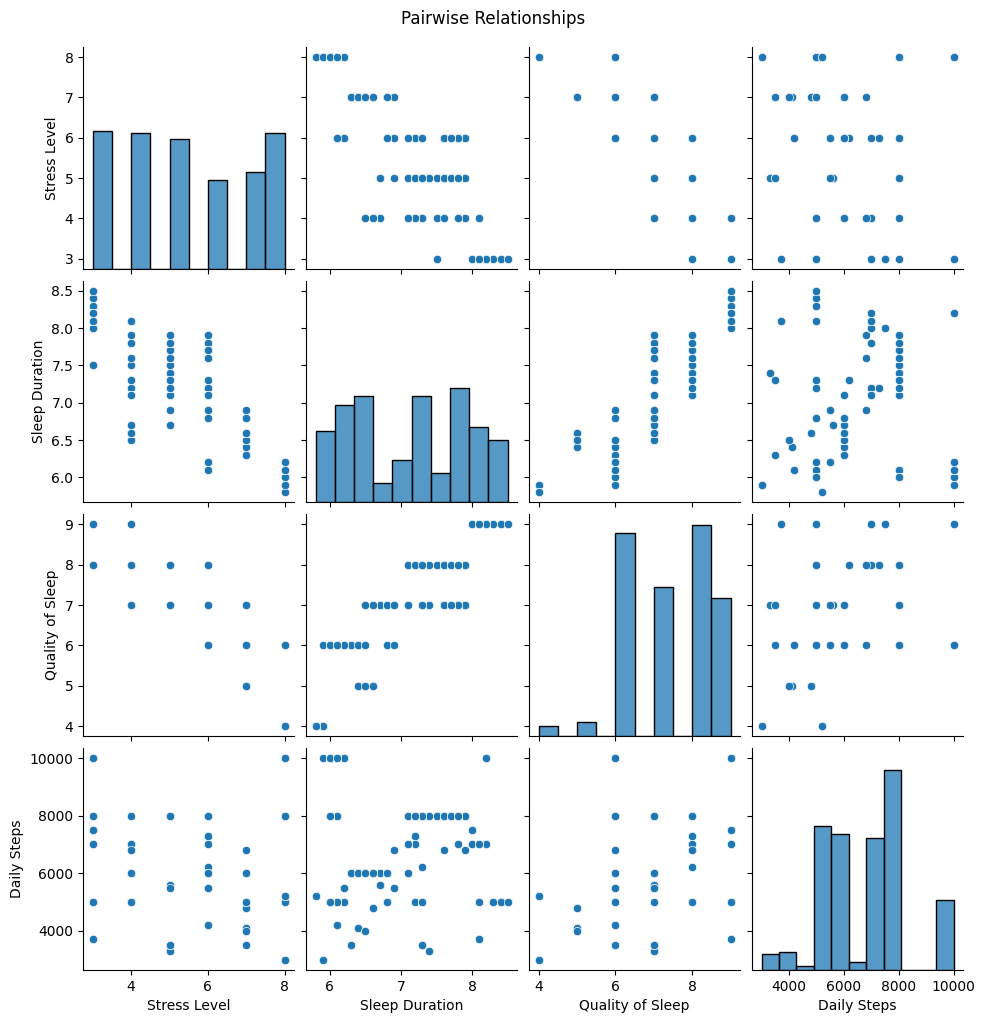

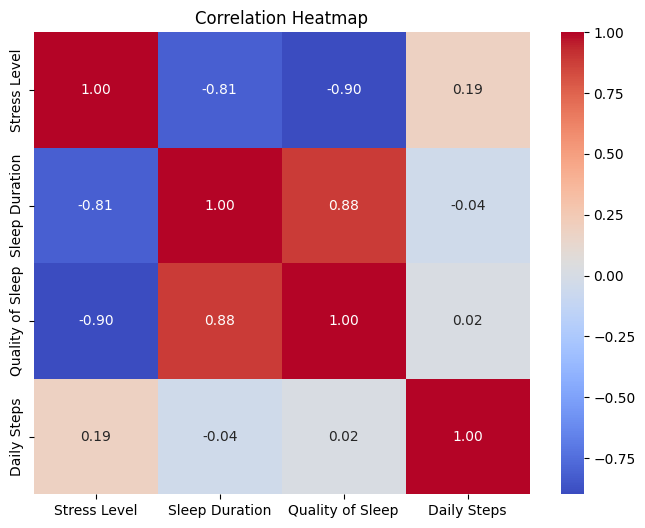

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr


df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

columns = ['Stress Level', 'Sleep Duration', 'Quality of Sleep', 'Daily Steps']
df_subset = df[columns]

print(df_subset.head())

print("\nSummary Statistics:")
print(df_subset.describe())

print("\nMissing Values:")
print(df_subset.isnull().sum())

# Plot distributions for each variable
df_subset.hist(figsize=(12, 8), bins=15, color='skyblue', edgecolor='black')
plt.suptitle('Distributions of Selected Variables')
plt.show()

# Pair plot to visualize relationships
sns.pairplot(df_subset)
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_subset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
df.shape

(374, 13)

In [42]:
stress_level = df_subset['Stress Level']
quality_of_sleep = df_subset['Quality of Sleep']
sleep_duration = df_subset['Sleep Duration']
daily_steps = df_subset['Daily Steps']

r_value_quality, p_value_quality = pearsonr(stress_level, quality_of_sleep)
r_value_duration, p_value_duration = pearsonr(stress_level, sleep_duration)
r_value_steps, p_value_steps = pearsonr(stress_level, daily_steps)


print("Stress Level vs Quality of Sleep")
print(f"r_value = {r_value_quality:.3f}")
print(f"p_value = {p_value_quality:.2e}")

print("\nStress Level vs Sleep Duration")
print(f"r_value = {r_value_duration:.3f}")
print(f"p_value = {p_value_duration:.2e}")

print("\nStress Level vs Daily Steps")
print(f"r_value = {r_value_steps:.3f}")
print(f"p_value = {p_value_steps:.2e}")

Stress Level vs Quality of Sleep
r_value = -0.899
p_value = 2.88e-135

Stress Level vs Sleep Duration
r_value = -0.811
p_value = 1.24e-88

Stress Level vs Daily Steps
r_value = 0.187
p_value = 2.80e-04


In [36]:
print("\nSummary Statistics:")
print(df_subset.describe())


Summary Statistics:
       Stress Level  Sleep Duration  Quality of Sleep   Daily Steps
count    374.000000      374.000000        374.000000    374.000000
mean       5.385027        7.132086          7.312834   6816.844920
std        1.774526        0.795657          1.196956   1617.915679
min        3.000000        5.800000          4.000000   3000.000000
25%        4.000000        6.400000          6.000000   5600.000000
50%        5.000000        7.200000          7.000000   7000.000000
75%        7.000000        7.800000          8.000000   8000.000000
max        8.000000        8.500000          9.000000  10000.000000


1. Describe structure of Data
The dataset contains 374 rows and 13 columns. After filtering we focused on three variables: Stress Level, Sleep Duration, Quality of Sleep, and Daily Steps.

Variables
Stress level: Numerical, measured on a scale of 1-10. The mean is 5.4, and everyone submitted a value between 3 and 8.
Sleep duration: Numerical, measured in hours. The mean is 7.13 hours, with the minimum at 5.8 hours and the maximum at 8.5 hours.
Quality of Sleep: Numerical, measured on a scale of 1-10. The mean is 7.31, and the minimum is at 4.0 and the maximum at 9.0.
Daily steps: Numerical. The mean is 6800 steps, and the minimum is 3000 steps, and the maximum is 10,000 steps.

2. Summarize Key Insights from EDA
Distributions
    Stress level: The histogram shows a fairly even distribution with everyone selecting a value between 3 and 8.
    Sleep duration: The histogram shows two peaks around 6 hours and 7 hours and another cluster around 8 hours. The duration varies from around 6 to 8.5 hours.
    Sleep quality: The histogram for sleep quality shows that most people reported a value between 6 and 9 on the scale of 1-10.
    Daily steps: The histogram shows a distribution with some outliers. Most people had around 7000 daily steps.
Relationships
    Stress level was negatively correlated with sleep duration and sleep quality. There is a stronger negative correlation between sleep quality and stress level than sleep duration and stress level. There does not seem to be much correlation between daily steps and stress, since the r value is 0.19.
    The r value for stress level and sleep quality is -0.899, and the r value for stress level and sleep duration is -0.811. The p values for Stress Level and Quality of Sleep and Stress Level and Sleep Duration are extremely small which shows that the correlation between these variables is highly statistically significant. The likelihood of observing these correlations by random chane is almost zero.
Potential Data Issues
    There were no missing values in the variables that we looked at. The categorical Sleep Disorder variable had several missing values, but we did not use that variable. There were some outliers in quality of sleep, but for the most part the data fit into concise ranges. There were also outliers in the Daily Steps data.

3. Justify project choice based on EDA
The EDA showed a clear relationship between the stress level and the sleep duration, and the stress level and sleep quality. These are important indicators of health and lifestyle, and thus it is very important to understand the relationship between these variables. Since the daily steps variable has a very low correlation with stress level we will not explor linear regression with Stress Level and Daily Steps. 


